<font size=4 color='blue'>Copyright: 2021</font>

<font size=4 color='blue'>Author: Fernand B. Eloundou</font>
    
------------------------------------------------------------------
    
<font size=4 color='black'>File: RWU_Simulation_Plots.ipynb</font>

-------------------------------------------------------------------
    

Transpiration rate (or RWU simulation) plots using soil hydraulic parameters of 
different data sources in the control and DL scenarios.

Data sources: HYPROP optimization, ROSETTA and Woesten PTFs (Seidel S, 2020)

In [1]:
# load liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Units
    
    * time, simtime = [s]
    * actual_trans, potential_trans, maximal_trans, calculated_actual_trans, hormone collar flow rate, hormone   source rate = [kg/s]
    * collar_pressure = [Pa]

In [2]:
# load data

columns = ['time','actual_trans','potential_trans','maximal_trans','collar_pressure','calculated_actual_trans','simtime']

# optimization
data_Hopt      = pd.read_csv('singleroot_Honly_opt_Ctrl_actual_transpiration.txt', names=columns)#.drop('simtime', axis=1)

# Woesten PTFs
data_Hpp       = pd.read_csv('singleroot_Honly_pp_Ctrl_actual_transpiration.txt', names=columns)#.drop('simtime', axis=1)

# ROSETTA PTFs
data_Hrosetta  = pd.read_csv('singleroot_Honly_rosetta_Ctrl_actual_transpiration.txt', names=columns)#.drop('simtime', axis=1)

# Deep Loosening
data_Hopt_DL   = pd.read_csv('singleroot_Honly_DL_actual_transpiration.txt', names=columns)#.drop('simtime', axis=1)

# weather data
climate           = pd.read_csv('ETc_Tpot_Epot.csv')

In [3]:
c = 24 * 3600                                       # s/day 
tHopt         = (data_Hopt['time']/c).values           # s --> [day]
tHpp          = (data_Hpp['time']/c).values
tHrosetta     = (data_Hrosetta['time']/c).values
tHopt_DL      = (data_Hopt_DL['time']/c).values
ppt           = climate['Precipitation'].values
days          = climate['Day'].values

In [4]:
# Cumulative transpiration 
ctransHopt          = np.cumsum(np.multiply(1000 * (data_Hopt['actual_trans'][1:,])*c, (tHopt[1:] - tHopt[:-1])))
ctransHpp           = np.cumsum(np.multiply(1000 * (data_Hpp['actual_trans'][1:,])*c, (tHpp[1:] - tHpp[:-1])))
ctransHrosetta      = np.cumsum(np.multiply(1000 * (data_Hrosetta['actual_trans'][1:,])*c, (tHrosetta[1:] - tHrosetta[:-1])))
ctransHopt_DL       = np.cumsum(np.multiply(1000 * (data_Hopt_DL['actual_trans'][1:,])*c, (tHopt_DL[1:] - tHopt_DL[:-1])))
ctransHoptP          = np.cumsum(np.multiply(1000 * (data_Hopt['potential_trans'][1:,])*c, (tHopt[1:] - tHopt[:-1])))
ctransHppP           = np.cumsum(np.multiply(1000 * (data_Hpp['potential_trans'][1:,])*c, (tHpp[1:] - tHpp[:-1])))
ctransHrosettaP      = np.cumsum(np.multiply(1000 * (data_Hrosetta['potential_trans'][1:,])*c, (tHrosetta[1:] - tHrosetta[:-1])))

In [5]:
# Actual transpiration in the control scenario
THopt_actual        = (data_Hopt['actual_trans']).values
THpp_actual         = (data_Hpp['actual_trans']).values
THrosetta_actual    = (data_Hrosetta['actual_trans']).values

# Potential transpiration in the control scenario
THopt_potential     = (data_Hopt['potential_trans']).values
THpp_potential      = (data_Hpp['potential_trans']).values
THrosetta_potential = (data_Hrosetta['potential_trans']).values

# Actual and potential transpiration in the DL scenario
THopt_actual_DL        = (data_Hopt_DL['actual_trans']).values
THopt_potential_DL     = (data_Hopt_DL['potential_trans']).values

# Pressure at the root collar
PHopt         = (data_Hopt['collar_pressure']).values
PHpp          = (data_Hpp['collar_pressure']).values
PHrosetta     = (data_Hrosetta['collar_pressure']).values
PHopt_DL      = (data_Hopt_DL['collar_pressure']).values

# Stress indices
stress_Hopt        = THopt_actual/THopt_potential
stress_Hpp          = THpp_actual/THpp_potential
stress_Hrosetta     = THrosetta_actual/THrosetta_potential
stress_Hopt_DL      = THopt_actual_DL/THopt_potential_DL

/home/eloundou/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/eloundou/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/eloundou/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/eloundou/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


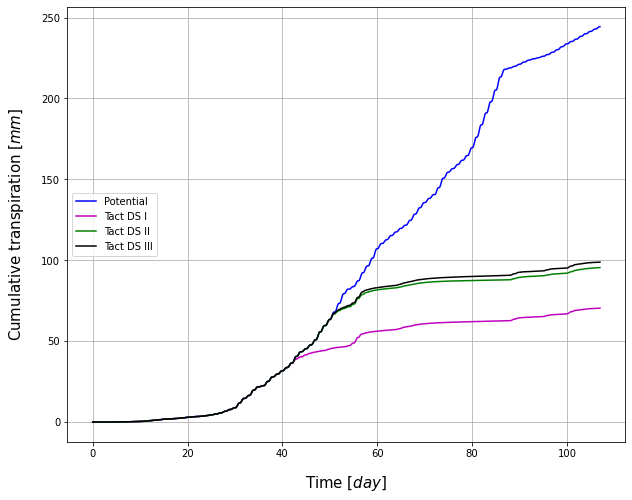

In [6]:
# Cumulative transpiration plot
plt.figure(figsize=(10,8))

plt.plot(tHopt[1:], ctransHoptP*330/1000, 'b', label='Potential')
plt.plot(tHopt[1:], ctransHopt*330/1000, 'm', label='Tact DS I')
plt.plot(tHpp[1:], ctransHpp*330/1000, 'g', label='Tact DS II')
plt.plot(tHrosetta[1:], ctransHrosetta*330/1000, 'k', label='Tact DS III')
plt.ylabel('Cumulative transpiration $[mm]$',fontsize=15, labelpad=15)
plt.xlabel('Time $[day]$',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Cumulative transpiration in Single root with Tpot Control.png')
plt.grid()

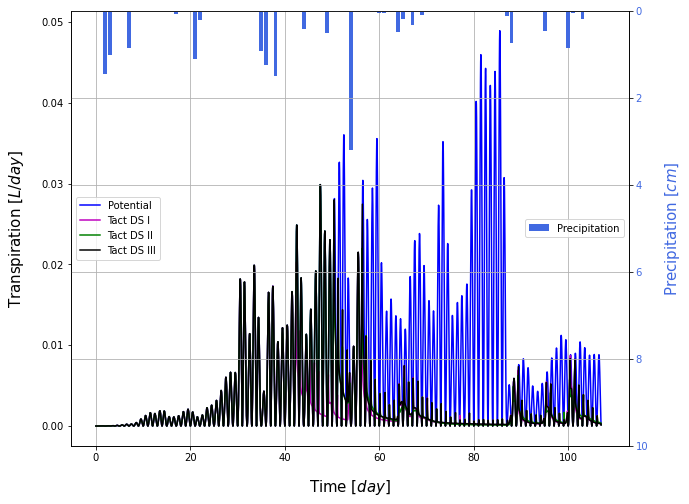

In [10]:
# Transpiration plot

fig, ax1 = plt.subplots(figsize=(10,8))
fig.subplots_adjust(right=0.9)

ax1.plot(tHopt, (THopt_potential * c), 'b', label='Potential')
ax1.plot(tHopt, (THopt_actual * c), 'm', label='Tact DS I')
ax1.plot(tHpp, (THpp_actual * c), 'g', label='Tact DS II')
ax1.plot(tHrosetta, (THrosetta_actual * c), 'k', label='Tact DS III')
ax1.set_ylabel('Transpiration $[L/day]$',fontsize=15, labelpad=15)
ax1.set_xlabel('Time $[day]$',fontsize=15, labelpad=15)
ax1.legend(loc='center left')
ax1.xaxis.grid()


ax2 = ax1.twinx()
ax2.bar(days, ppt*0.1, color='royalblue', label='Precipitation')                #ppt [cm/day]
ax2.set_ylim(0, 10)
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('Precipitation $[cm]$', color='royalblue', fontsize=15, labelpad=15)
ax2.legend(loc='center right')
ax2.yaxis.grid()


plt.savefig('Transpiration rate in Single root control.png')

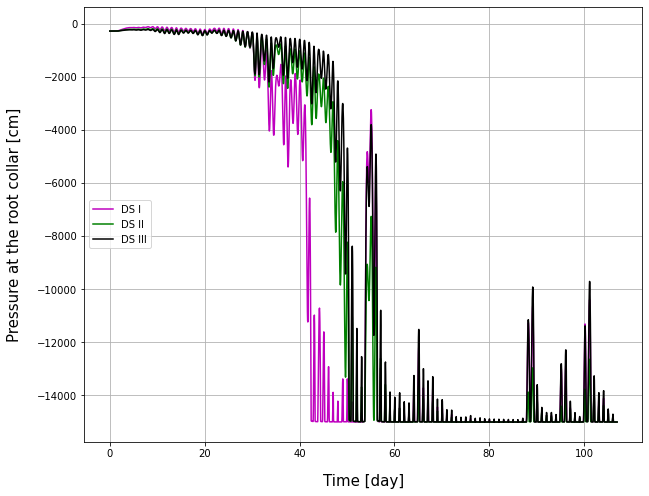

In [11]:
# Pressure at the collar plot
plt.figure(figsize=(10,8))

plt.plot(tHopt, (PHopt - 1.e5)*100./1.e3/9.81, 'm', label='DS I')       # convert from Pa to cm
plt.plot(tHpp, (PHpp - 1.e5)*100./1.e3/9.81, 'g', label='DS II')
plt.plot(tHrosetta, (PHrosetta - 1.e5)*100./1.e3/9.81, 'k', label='DS III')
plt.ylabel('Pressure at the root collar [cm]',fontsize=15, labelpad=15)
plt.xlabel('Time [day]',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Collar Pressure in Single root control.png')
plt.grid()

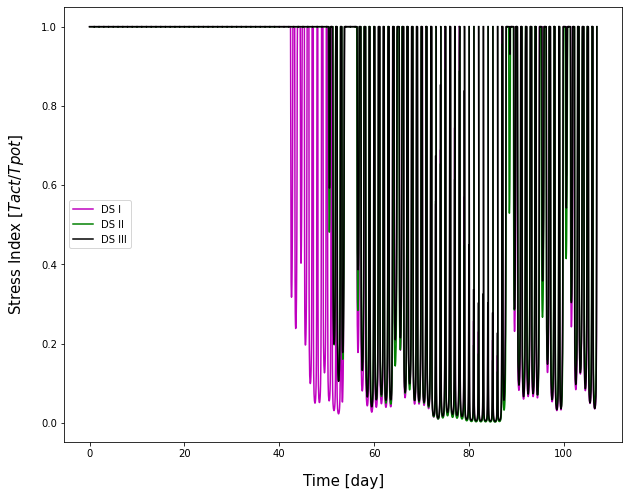

In [12]:
# Stress index plot
plt.figure(figsize=(10,8))

plt.plot(tHopt, stress_Hopt, 'm', label='DS I')
plt.plot(tHpp, stress_Hpp, 'g', label='DS II')
plt.plot(tHrosetta, stress_Hrosetta, 'k', label='DS III')
plt.ylabel('Stress Index $[Tact/Tpot]$',fontsize=15, labelpad=15)
plt.xlabel('Time [day]',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Stress index in Single root control.png')

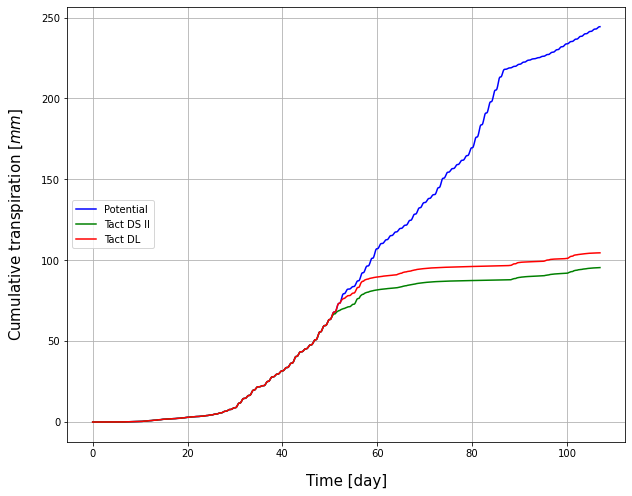

In [13]:
# Cumulative transpiration plot
plt.figure(figsize=(10,8))

plt.plot(tHopt[1:], ctransHoptP*330/1000, 'b', label='Potential')
plt.plot(tHpp[1:], ctransHpp*330/1000, 'g', label='Tact DS II')
plt.plot(tHopt_DL[1:], ctransHopt_DL*330/1000, 'r', label='Tact DL')
plt.ylabel('Cumulative transpiration $[mm]$',fontsize=15, labelpad=15)
plt.xlabel('Time [day]',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Cumulative transpiration in Single root with Tpot Control and DL.png')
plt.grid()

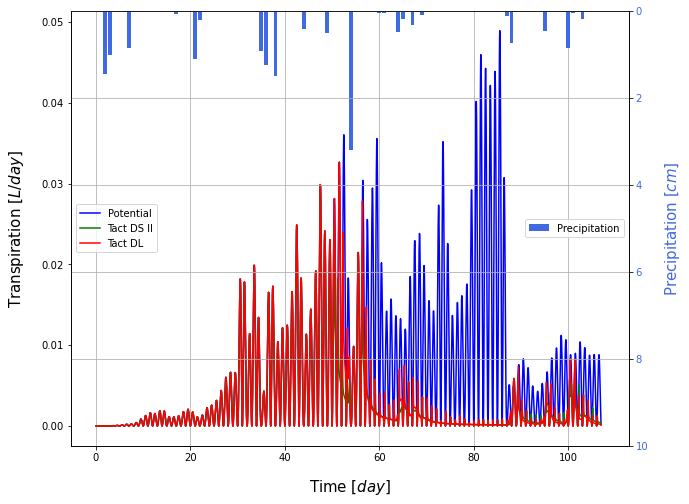

In [14]:
# Transpiration plot
fig, ax1 = plt.subplots(figsize=(10,8))
fig.subplots_adjust(right=0.9)

ax1.plot(tHopt, (THopt_potential * c), 'b', label='Potential')
ax1.plot(tHpp, (THpp_actual * c), 'g', label='Tact DS II')
ax1.plot(tHopt_DL, (THopt_actual_DL* c), 'r', label='Tact DL')
ax1.set_ylabel('Transpiration $[L/day]$',fontsize=15, labelpad=15)
ax1.set_xlabel('Time $[day]$',fontsize=15, labelpad=15)
ax1.legend(loc='center left')
ax1.xaxis.grid()

ax2 = ax1.twinx()
ax2.bar(days, ppt*0.1, color='royalblue', label='Precipitation')                #ppt [cm/day]
ax2.set_ylim(0, 10)
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('Precipitation $[cm]$', color='royalblue',fontsize=15, labelpad=15)
ax2.legend(loc='center right')
ax2.yaxis.grid()

plt.savefig('Transpiration rate in Single root control and DL.png')

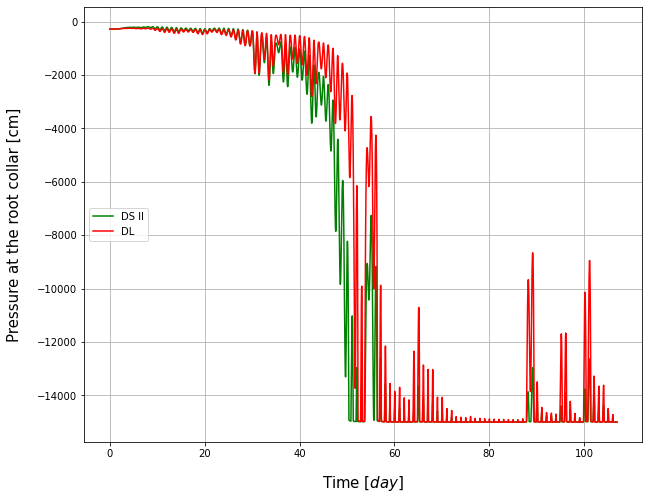

In [15]:
# Pressure at the collar plot
plt.figure(figsize=(10,8))

plt.plot(tHpp, (PHpp - 1.e5)*100./1.e3/9.81, 'g', label='DS II')            # convert from Pa to cm
plt.plot(tHopt_DL, (PHopt_DL - 1.e5)*100./1.e3/9.81, 'r', label='DL')
plt.ylabel('Pressure at the root collar [cm]',fontsize=15, labelpad=15)
plt.xlabel('Time $[day]$',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Collar Pressure in Single root control and DL.png')
plt.grid()

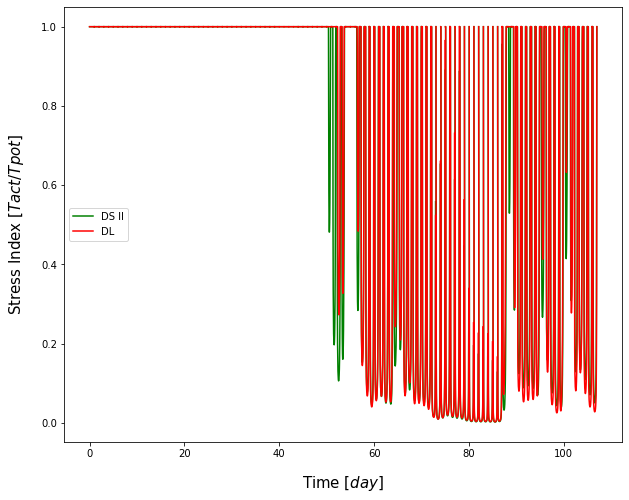

In [16]:
# Stress index plot 
plt.figure(figsize=(10,8))

plt.plot(tHpp, stress_Hpp, 'g', label='DS II')
plt.plot(tHopt_DL, stress_Hopt_DL, 'r', label='DL')
plt.ylabel('Stress Index $[Tact/Tpot]$',fontsize=15, labelpad=15)
plt.xlabel('Time $[day]$',fontsize=15, labelpad=15)
plt.legend(loc='center left')

plt.savefig('Stress index in Single root control and DL.png')